### Hierarchical Clustering algorithm using scipy.cluster.hierarchy
This tutorial documents use of scipy.cluster.hierarchy for agglomerative cluster analysis. Using linkage() with 'average' distance method we derive linkage cluster array Z. <br>

Hierarchical clustering is an agglomeration clustering that starts by considering each data point as a cluster and goes forward by merging these clusters based on some similairty until it reaches the number of clusers we mention. <br>
To calculate similarty between clusters, various types of distances called linkages are used. <br>
Linkages - <br>
Single is minimum distance between datapoints in cluster <br>
Complete is maximum distance between datapoints in cluster <br>
Average is the average distance between datapoints in cluster <br>
Centroid is distance between centroids of datapoints or clusters. <br>



For this algorithm I considered same wines dataset. But I have used only the first two columns - Alcohol, Malic.acid data for this.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wines = pd.read_csv("data/wine.csv")
wines.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
wine = wines.drop('Wine', axis=1)

In [3]:
wine.columns

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [4]:
wine.drop(['Ash','Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth',
           'Color.int', 'Hue', 'OD', 'Proline'], axis=1, inplace=True)

In [5]:
wine.columns

Index(['Alcohol', 'Malic.acid'], dtype='object')

In [23]:
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
X = np.array(wine.values)

In [24]:
X

array([[ 14.23,   1.71],
       [ 13.2 ,   1.78],
       [ 13.16,   2.36],
       [ 14.37,   1.95],
       [ 13.24,   2.59],
       [ 14.2 ,   1.76],
       [ 14.39,   1.87],
       [ 14.06,   2.15],
       [ 14.83,   1.64],
       [ 13.86,   1.35],
       [ 14.1 ,   2.16],
       [ 14.12,   1.48],
       [ 13.75,   1.73],
       [ 14.75,   1.73],
       [ 14.38,   1.87],
       [ 13.63,   1.81],
       [ 14.3 ,   1.92],
       [ 13.83,   1.57],
       [ 14.19,   1.59],
       [ 13.64,   3.1 ],
       [ 14.06,   1.63],
       [ 12.93,   3.8 ],
       [ 13.71,   1.86],
       [ 12.85,   1.6 ],
       [ 13.5 ,   1.81],
       [ 13.05,   2.05],
       [ 13.39,   1.77],
       [ 13.3 ,   1.72],
       [ 13.87,   1.9 ],
       [ 14.02,   1.68],
       [ 13.73,   1.5 ],
       [ 13.58,   1.66],
       [ 13.68,   1.83],
       [ 13.76,   1.53],
       [ 13.51,   1.8 ],
       [ 13.48,   1.81],
       [ 13.28,   1.64],
       [ 13.05,   1.65],
       [ 13.07,   1.5 ],
       [ 14.22,   3.99],


(178, 2)


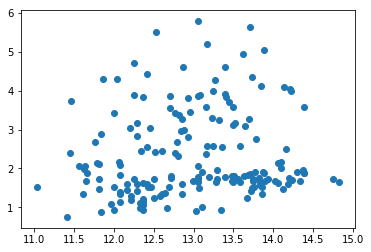

In [25]:
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [57]:
# generate the linkage matrix
Z = linkage(X, 'average')

Calculating cophenetic correlation - is a kind of measure of suitability. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. (source: https://en.wikipedia.org/wiki/Cophenetic_correlation )
We can use scipy.cluster.hierarchy.cophenet to calculate this.

In [58]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.68470982846001538

A cophenetic correlation closer to 1 indicates clustering preserves original distances. The value we gotfor this data is not very ideal. <br>
Dendogram shows the order and distances of merges during clustering. <br>
x-axis has the labels i.e., values from data X <br>
y-axis has the distances calculated

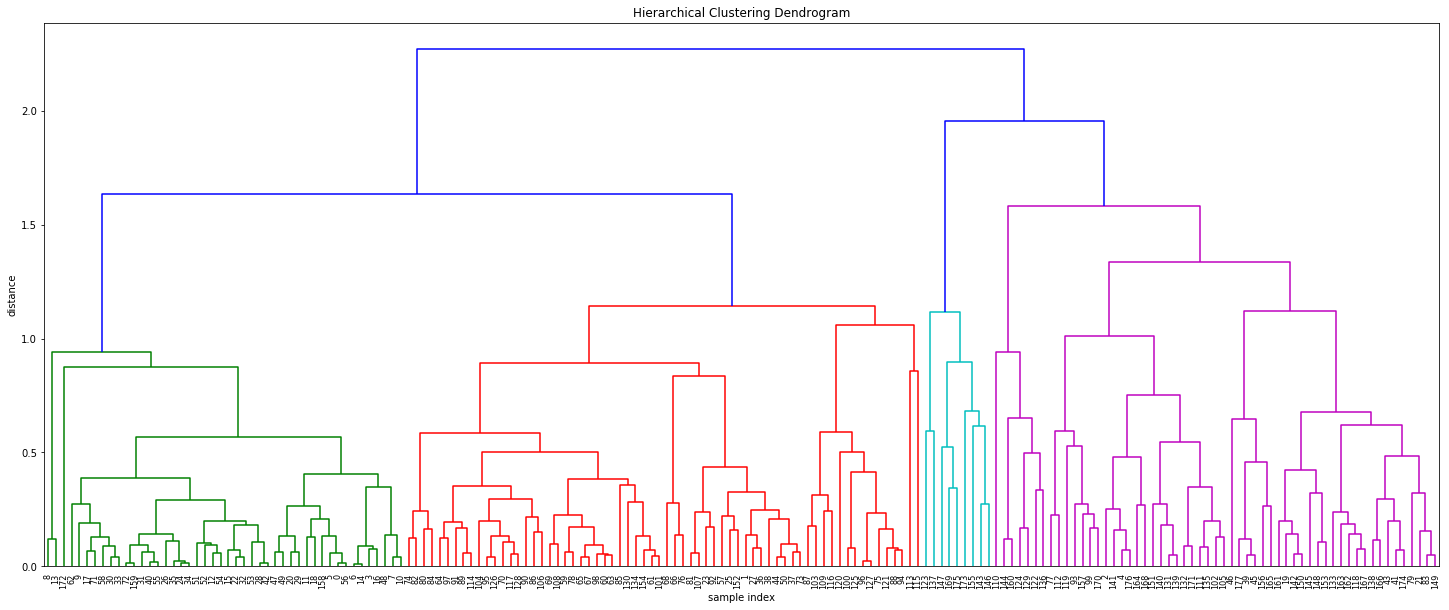

In [59]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

As the dendogram plotted is not clear, we can truncate and show only last few cluster merges.

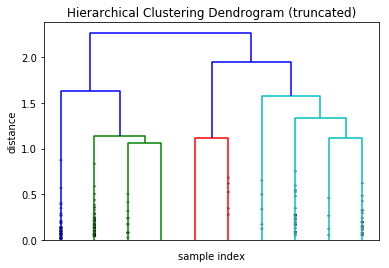

In [62]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

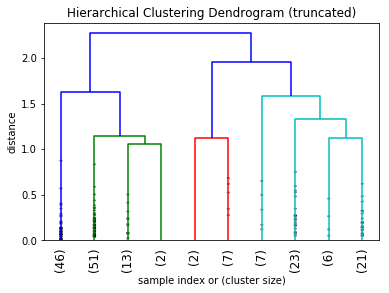

In [63]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

The values on x-axis in () represent cluster sizes.

#### References:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html <br>
https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/ <br>